# Lista de exercícios 1A – Sinais digitais (resolução)

**Definições das funções impseq, stepseq, sigadd, sigmult, sigshift, sigfold utilizadas nos códigos**

In [2]:
import numpy as np

def impseq(n0,n1,n2):
    
    #      Generates x(n) = delta(n-n0); n1 <= n <= n2
    #      ----------------------------------------------
    #      [x,n] = impseq(n0,n1,n2)
    #     
        
    n=np.array(range(n1,n2+1))
    x = n-n0
    for i in range(len(x)):
        if x[i]!=0: x[i]=0
        else: x[i]=1
    #x = (n-n0) == 0
    return [x,n]

def stepseq(n0,n1,n2):
    #     Generates x(n) = u(n-n0); n1 <= n <= n2
    #     ------------------------------------------
    #     [x,n] = stepseq(n0,n1,n2)
    #
    n=np.arange(n1,n2+1)
    x = n-n0
    for i in range(len(x)):
        if x[i]<0: x[i]=0
        else: x[i]=1
    #x = [(n-n0) >= 0]
    return [x,n]

def  sigadd(x1,n1,x2,n2):
    # % implements y(n) = x1(n)+x2(n)
    # % -----------------------------
    # % [y,n] = sigadd(x1,n1,x2,n2)
    # % y = sum sequence over n, which includes n1 and n2
    # % x1 = first sequence over n1
    # % x2 = second sequence over n2 (n2 can be different from n1)
    # %
    n = np.arange(min(n1.min(0),n2.min(0)),max(n1.max(0),n2.max(0))+1) # duration of y(n)
    y1 = np.zeros((1,len(n)))  #initialization
    y1=y1[0,:]
    y2 = y1.copy()
    y1[np.nonzero(np.logical_and((n>=n1.min(0)),(n<=n1.max(0)))==1)]=x1.copy()
    y2[np.nonzero(np.logical_and((n>=n2.min(0)),(n<=n2.max(0)))==1)]=x2.copy()
    y = y1+y2;
    return [y,n]


def  sigmult(x1,n1,x2,n2):
    # % implements y(n) = x1(n)*x2(n)
    # % -----------------------------
    # % [y,n] = sigmult(x1,n1,x2,n2)
    # % y = product sequence over n, which includes n1 and n2
    # % x1 = first sequence over n1
    # %
    n = np.arange(min(n1.min(0),n2.min(0)),max(n1.max(0),n2.max(0))+1) # duration of y(n)
    y1 = np.zeros((1,len(n)))  #initialization
    y1=y1[0,:]
    y2 = y1.copy()
    y1[np.nonzero(np.logical_and((n>=n1.min(0)),(n<=n1.max(0)))==1)]=x1.copy()
    y2[np.nonzero(np.logical_and((n>=n2.min(0)),(n<=n2.max(0)))==1)]=x2.copy()
    y = y1*y2
    return [y,n]


def sigshift(x,m,k):
    # % implements y(n) = x(n-k)
    # % -------------------------
    # % [y,n] = sigshift(x,m,k)
    # %
    n = m+k
    y = x.copy()
    return [y,n]


def sigfold(x,n):
    # % implements y(n) = x(-n)
    # % -----------------------
    # % [y,n] = sigfold(x,n)
    # %
    y = np.flip(x)
    n = -np.flip(n)
    return [y,n]

def conv_m(x,nx,h,nh):
    # Modified convolution routine for signal processing
    # --------------------------------------------------
    # [y,ny] = conv_m(x,nx,h,nh)
    # [y,ny] = convolution result
    # [x,nx] = first signal
    # [h,nh] = second signal
    # 
    nyb = nx[0]+nh[0]
    nye = nx[len(x)-1] + nh[len(h)-1]
    ny = np.arange(nyb,nye+1)
    y = np.convolve(x,h)
    return [y,ny]



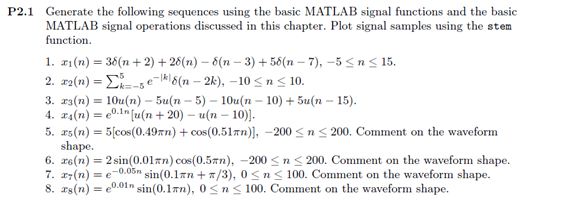

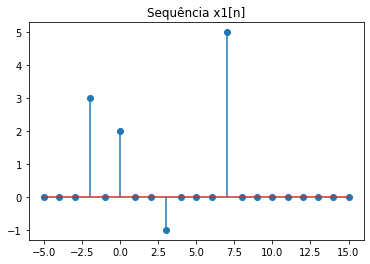

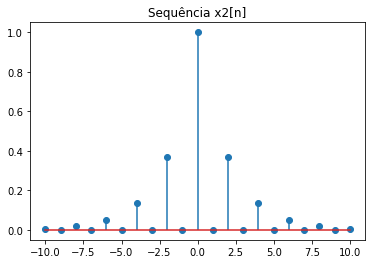

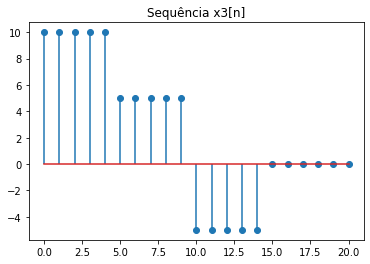

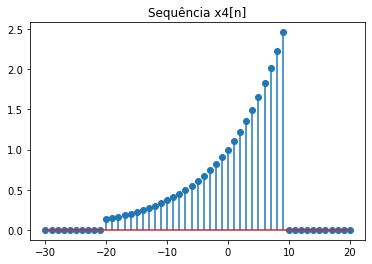

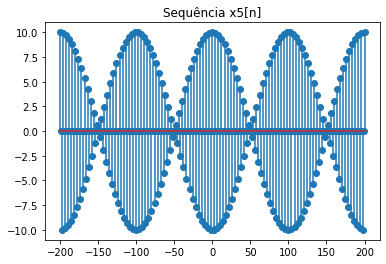

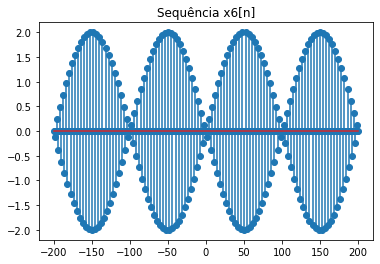

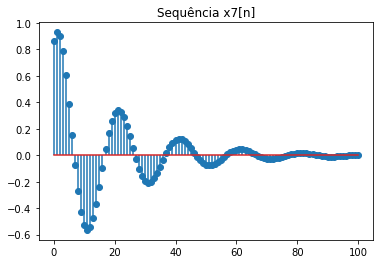

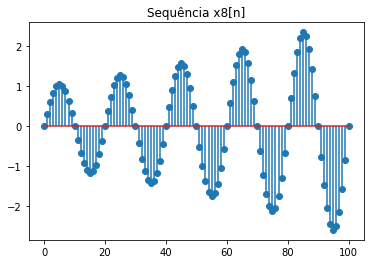

In [3]:
import matplotlib.pyplot as plt
#from fDSP import impseq,stepseq,sigadd,sigmult,sigshift,sigfold
import numpy as np

#Exercicio 2.1


# 1.
[x11,n] = impseq(-2,-5,15)
[x12,n] = impseq(0,-5,15)
[x13,n] = impseq(3,-5,15)
[x14,n] = impseq(7,-5,15)

x1 = 3*x11 + 2*x12 - x13 + 5*x14

plt.figure()
plt.stem(n,x1)
plt.title("Sequência x1[n]")


# 2.
x2 = np.zeros(21)
for k in range(-5,6):
    [x21,n] = impseq(2*k,-10,10)
    x21 = x21 * np.exp(-np.abs(k))
    x2 = x2 + x21

plt.figure()
plt.stem(n,x2)
plt.title("Sequência x2[n]")

# 3.
[x31,n] = stepseq(0,0,20)
[x32,n] = stepseq(5,0,20)
[x33,n] = stepseq(10,0,20)
[x34,n] = stepseq(15,0,20)

x3 = 10*x31 - 5*x32 - 10*x33 +5*x34

plt.figure()
plt.stem(n,x3)
plt.title("Sequência x3[n]")

# 4.
[x41,n] = stepseq(-20,-30,20)
[x42,n] = stepseq(10,-30,20)
x43 = x41 - x42
x4 = np.exp(0.1*n)*x43

plt.figure()
plt.stem(n,x4)
plt.title("Sequência x4[n]")


# 5.
n= np.arange(-200,201)
x5 = 5*(np.cos(0.49*np.pi*n) + np.cos(0.51*np.pi*n))

plt.figure()
plt.stem(n,x5)
plt.title("Sequência x5[n]")

# 6.
n= np.arange(-200,201)
x6 = 2*np.sin(0.01*np.pi*n)*np.cos(0.5*np.pi*n)

plt.figure()
plt.stem(n,x6)
plt.title("Sequência x6[n]")

# 7.
n= np.arange(101)
x7 = np.exp(-0.05*n)*np.sin(0.1*np.pi*n +np.pi/3)

plt.figure()
plt.stem(n,x7)
plt.title("Sequência x7[n]")

# 8.
n= np.arange(101)
x8 = np.exp(0.01*n)*np.sin(0.1*np.pi*n)

plt.figure()
plt.stem(n,x8)
plt.title("Sequência x8[n]")

plt.show()

In [ ]:
x5 e x6: modulação em amplitude
x7: oscilação amortecida
x8: oscilação com ressonância

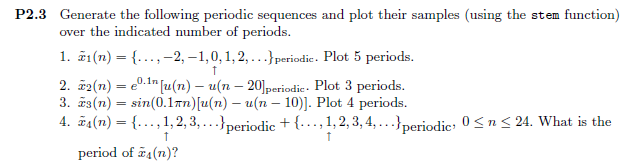

In [4]:
import matplotlib.pyplot as plt
import numpy as np


Text(0.5, 1.0, 'Sequência exercício P2.3.1')

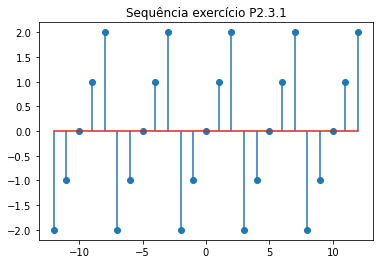

In [5]:
# 1.
n=np.arange(-12,13)
x=np.array([-2,-1, 0, 1, 2])
y=np.tile(x,5)

plt.figure()
plt.stem(n,y)
plt.title("Sequência exercício P2.3.1")


Text(0.5, 1.0, 'Sequência exercício P2.3.2')

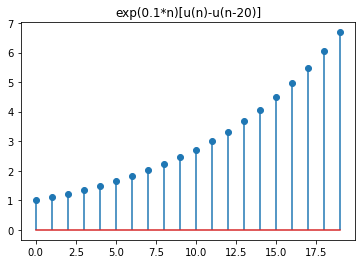

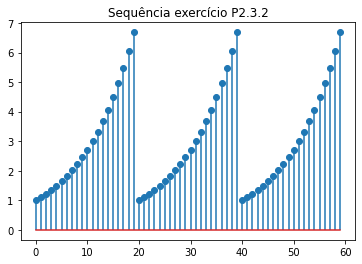

In [6]:
# 2.
n1=np.arange(0,20)
x=np.exp(0.1*n1)
plt.figure()
plt.stem(n1,x)
plt.title("exp(0.1*n)[u(n)-u(n-20)]")

n=np.arange(0,60)
y=np.tile(x,3)

plt.figure()
plt.stem(n,y)
plt.title("Sequência exercício P2.3.2")

Text(0.5, 1.0, 'Sequência exercício P2.3.3')

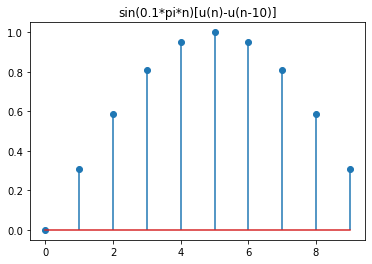

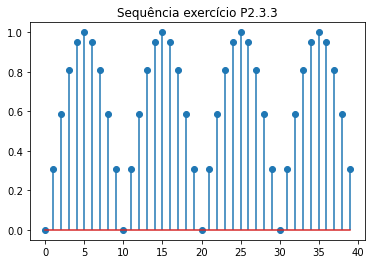

In [7]:
# 3.
n1=np.arange(0,10)
x=np.sin(0.1*np.pi*n1)
plt.figure()
plt.stem(n1,x)
plt.title("sin(0.1*pi*n)[u(n)-u(n-10)]")

n=np.arange(0,40)
y=np.tile(x,4)

plt.figure()
plt.stem(n,y)
plt.title("Sequência exercício P2.3.3")

Text(0.5, 1.0, 'Sequência exercício P2.3.4')

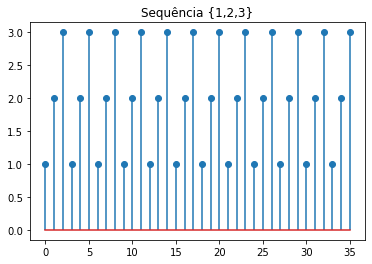

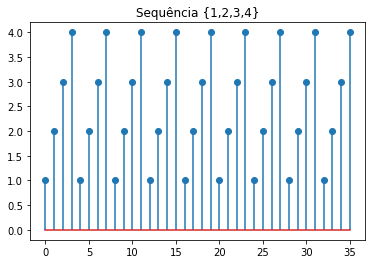

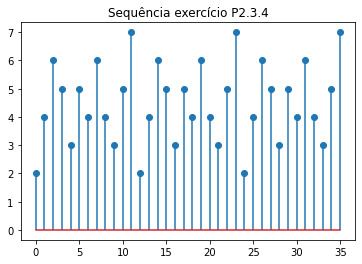

In [8]:
# 4.
n=np.arange(0,36)
x=np.array([1, 2, 3])
x1=np.tile(x,12)
plt.figure()
plt.stem(n,x1)
plt.title("Sequência {1,2,3}")

x=np.array([1, 2, 3, 4])
x2=np.tile(x,9)
plt.figure()
plt.stem(n,x2)
plt.title("Sequência {1,2,3,4}")


plt.figure()
plt.stem(n,x1+x2)
plt.title("Sequência exercício P2.3.4")

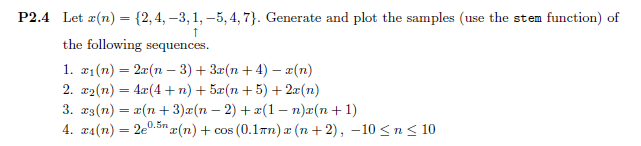

Text(0.5, 1.0, 'Sequência x[n]')

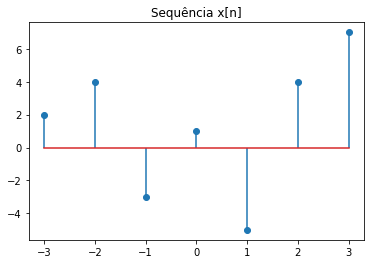

In [11]:
n=np.arange(-3, 4)
x=np.array([2, 4, -3, 1, -5, 4, 7])
plt.figure()
plt.stem(n,x)
plt.title("Sequência x[n]")


(-8.0, 7.0, -18.0, 25.0)

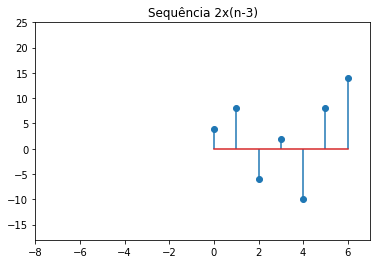

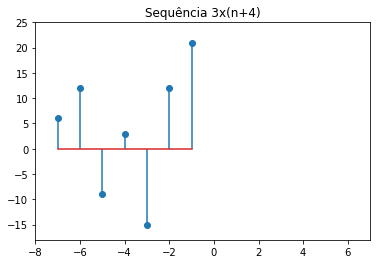

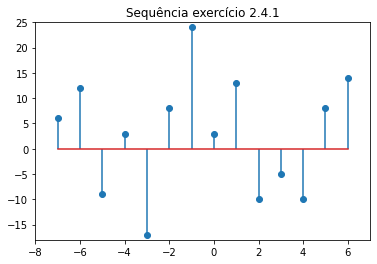

In [12]:
# 1.
[x11,n11] = sigshift(x,n,3)
[x12,n12] = sigshift(x,n,-4)
plt.figure()
plt.stem(n11,2*x11)
plt.title("Sequência 2x(n-3)")
plt.axis([-8, 7, -18, 25])
plt.figure()
plt.stem(n12,3*x12)
plt.title("Sequência 3x(n+4)")
plt.axis([-8, 7, -18, 25])
[x1a,n1a] = sigadd(2*x11,n11,3*x12,n12)
[x1,n1] = sigadd(x1a,n1a,-x,n)
plt.figure()
plt.stem(n1,x1)
plt.title("Sequência exercício 2.4.1")
plt.axis([-8, 7, -18, 25])

(-9.0, 4.0, -22.0, 60.0)

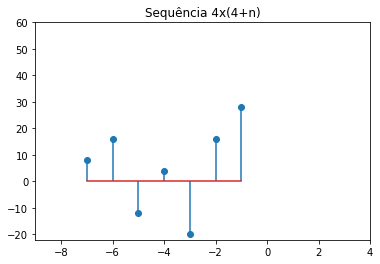

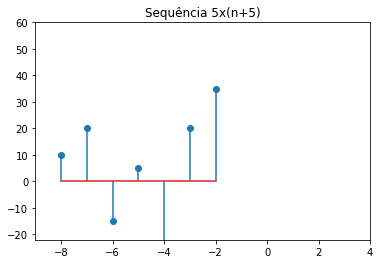

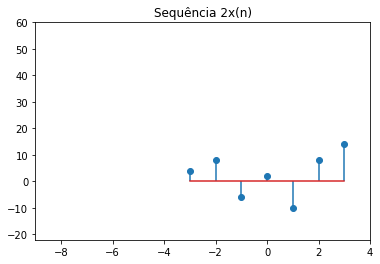

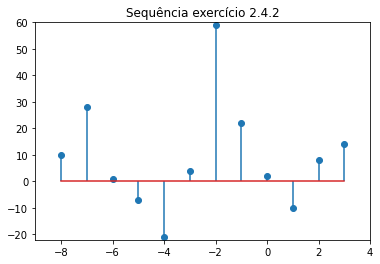

In [13]:
# 2.
[x21,n21] = sigshift(x,n,-4)
[x22,n22] = sigshift(x,n,-5)
plt.figure()
plt.stem(n21,4*x21)
plt.title("Sequência 4x(4+n)")
plt.axis([-9, 4, -22, 60])
plt.figure()
plt.stem(n22,5*x22)
plt.title("Sequência 5x(n+5)")
plt.axis([-9, 4, -22, 60])
[x2a,n2a] = sigadd(4*x21,n21,5*x22,n22);
plt.figure()
plt.stem(n,2*x)
plt.title("Sequência 2x(n)")
plt.axis([-9, 4, -22, 60]) 
[x2,n2] = sigadd(x2a,n2a,2*x,n);
plt.figure()
plt.stem(n2,x2)
plt.title("Sequência exercício 2.4.2")
plt.axis([-9, 4, -22, 60]) 


(-7.0, 6.0, -22.0, 54.0)

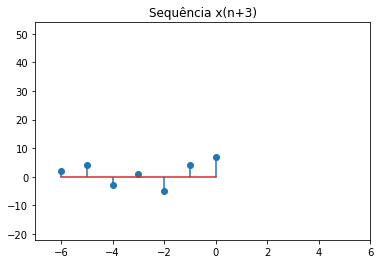

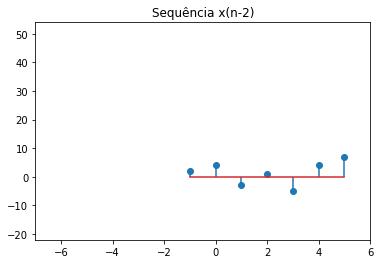

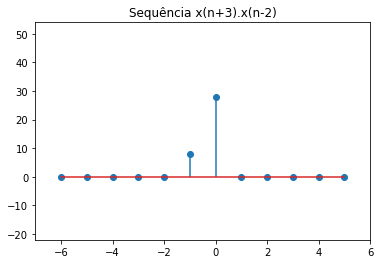

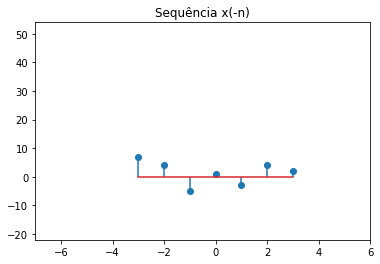

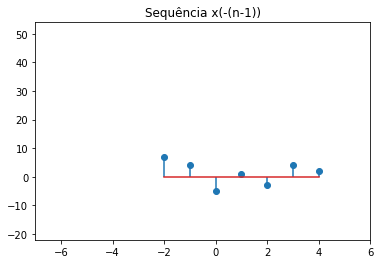

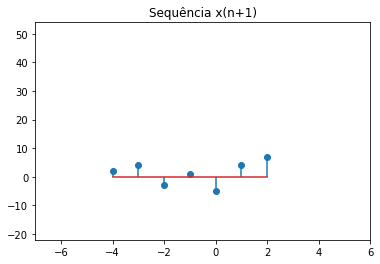

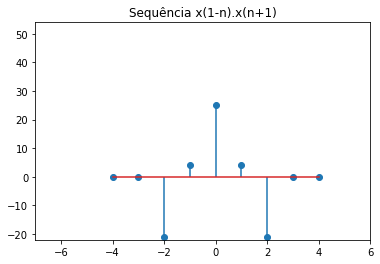

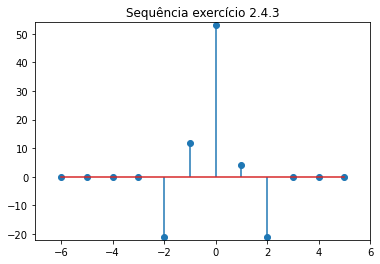

In [14]:
# 3.
[x31,n31] = sigshift(x,n,-3)
[x32,n32] = sigshift(x,n,2)
plt.figure()
plt.stem(n31,x31)
plt.title("Sequência x(n+3)")
plt.axis([-7, 6, -22, 54])
plt.figure()
plt.stem(n32,x32)
plt.title("Sequência x(n-2)")
plt.axis([-7, 6, -22, 54])
[x33,n33] = sigmult(x31,n31,x32,n32)
plt.figure()
plt.stem(n33,x33)
plt.title("Sequência x(n+3).x(n-2)")
plt.axis([-7, 6, -22, 54]) 
[x34a,n34a] = sigfold(x,n)
plt.figure()
plt.stem(n34a,x34a)
plt.title("Sequência x(-n)")
plt.axis([-7, 6, -22, 54])  
[x34,n34] = sigshift(x34a,n34a,1)
plt.figure()
plt.stem(n34,x34)
plt.title("Sequência x(-(n-1))")
plt.axis([-7, 6, -22, 54])  
[x35,n35] = sigshift(x,n,-1)
plt.figure()
plt.stem(n35,x35)
plt.title("Sequência x(n+1)")
plt.axis([-7, 6, -22, 54])    
[x36,n36] = sigmult(x34,n34,x35,n35)
plt.figure()
plt.stem(n36,x36)
plt.title("Sequência x(1-n).x(n+1)")
plt.axis([-7, 6, -22, 54])   
[x3,n3] = sigadd(x33,n33,x36,n36)
plt.figure()
plt.stem(n3,x3)
plt.title("Sequência exercício 2.4.3")
plt.axis([-7, 6, -22, 54])   

(-11.0, 11.0, -12.0, 70.0)

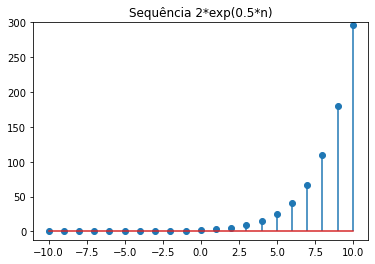

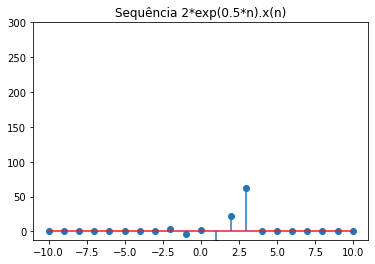

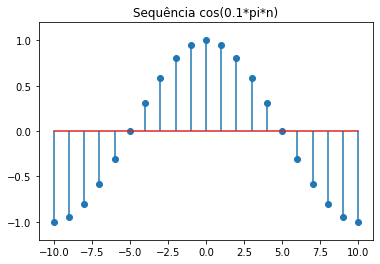

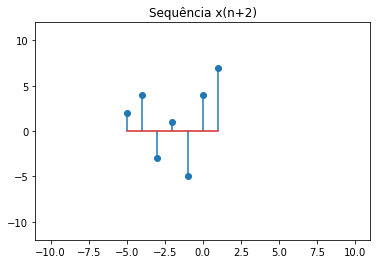

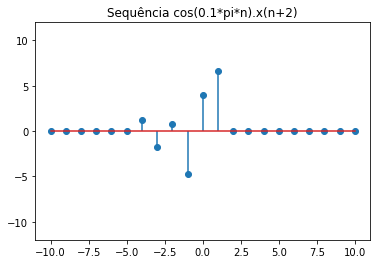

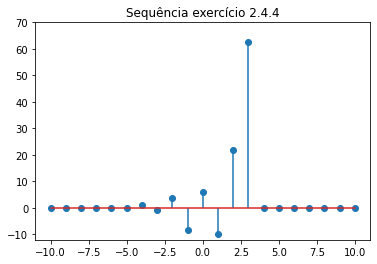

In [15]:
# 4.
n41=np.arange(-10, 11)
x41=2*np.exp(0.5*n41)
plt.figure()
plt.stem(n41,x41)
plt.title("Sequência 2*exp(0.5*n)")
plt.axis([-11, 11, -12, 300])
[x42,n42] = sigmult(x41,n41,x,n)
plt.figure()
plt.stem(n42,x42)
plt.title("Sequência 2*exp(0.5*n).x(n)")
plt.axis([-11, 11, -12, 300])
x43=np.cos(0.1*np.pi*n41)
plt.figure()
plt.stem(n41,x43)
plt.title("Sequência cos(0.1*pi*n)")
plt.axis([-11, 11, -1.2, 1.2]) 
[x44,n44] = sigshift(x,n,-2)
plt.figure()
plt.stem(n44,x44)
plt.title("Sequência x(n+2)")
plt.axis([-11, 11, -12, 12]) 
[x45,n45] = sigmult(x43,n41,x44,n44)
plt.figure()
plt.stem(n45,x45)
plt.title("Sequência cos(0.1*pi*n).x(n+2)")
plt.axis([-11, 11, -12, 12]) 
[x4,n4] = sigadd(x42,n42,x45,n45)
plt.figure()
plt.stem(n4,x4)
plt.title("Sequência exercício 2.4.4")
plt.axis([-11, 11, -12, 70])

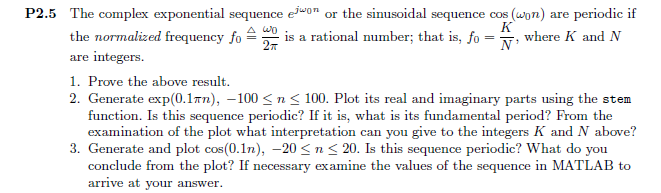

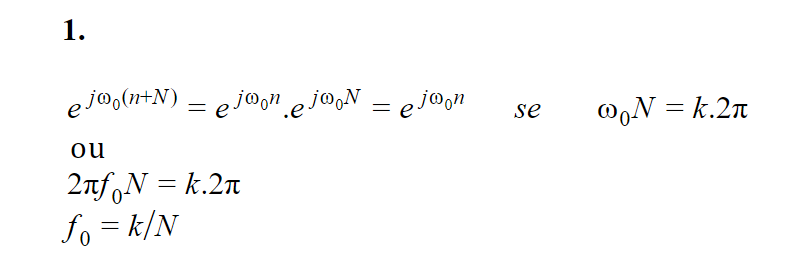

2. 

f0 = 0.1/2 = 1/20 = K/N

**K** é quantidade de períodos da função analógica em N pontos

**N** é  periodicidade real do sinal digital (se repete a cada N pontos)


Text(0.5, 1.0, 'Parte IMAGINÁRIA')

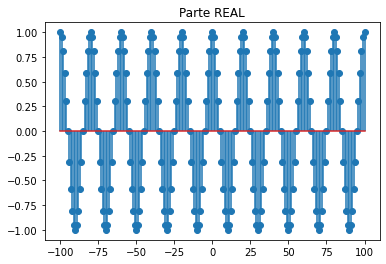

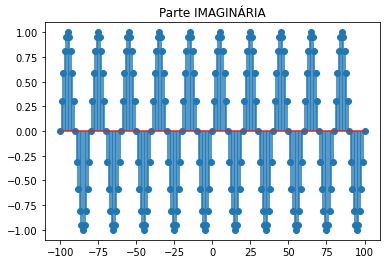

In [16]:
n=np.arange(-100, 101)
alpha = 0.1*np.pi*1j
x = np.exp(alpha*n)
plt.figure()
plt.stem(n,np.real(x))
plt.title("Parte REAL")

plt.figure()
plt.stem(n,np.imag(x))
plt.title("Parte IMAGINÁRIA")

3.
O sinal não é periódico, pois as amostras não se repetem nunca (num período fixo) - pois f0 não é um número racional.


Text(0.5, 1.0, 'Sequência cos(0.1n)')

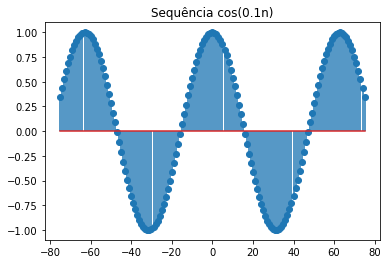

In [17]:
# 3.
n=np.arange(-75, 76)
x = np.cos(0.1*n)
plt.figure()
plt.stem(n,x)
plt.title("Sequência cos(0.1n)")